

## <font color='blue'> Image Compression using TENT  MAP</font> 

### Image compression for any p value using Tent map.


####  <font color='brown'>A Novel Compression Based Architecture for Memory Encoding</font>

In [0]:
### This is the code for encoding an image with eight GLS neuron bitplane
### Author: Harikrishnan NB
### Research Associate, National Institute of Advanced Studies

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from decimal import *
import math


### Skew Tent Map

In [0]:

def skew_tent(x,a,b,c):
  
    if x < b:
        xn = ((c - a)*x)/(b - a)
    else:
        xn = ((-(c-a)*(x-b))/(c - b)) + (c - a)
    return xn



### Decimal To Binary

In [0]:
## dec2bin

#no = 2
bits = 8

def dec2bin(no,bits):
    res = np.zeros((1,bits))
    k = -1
    for i in range(bits):
        if (no%2 == 0):

            res[0,k] = 0
        else:

            res[0,k] = 1
        k = k - 1
        no = (no - no%2) / 2
    dec2bin = res[0].astype(np.int)
    return dec2bin

### Back iteration

In [0]:

def inv_skew_tent(num, a, b, c):
  j = 0
  for bit in num:
    if j ==0 and num[0] == 0:
      y = [a, b]
      val0 = np.multiply((b-a),y)/(c-a)
      val1 = np.multiply(-(c-b),y)/(c-a) + c
      out = np.array([val0, val1])
      for i in range(0,out.shape[0]):
        if out[i,0]>out[i,1]:
          temp = out[i,0]
          out[i,0] = out[i,1]
          out[i,1] = temp
      j = j+1
      y = out[bit]
    if j ==0 and num[0] == 1:
      y = [b, c]
      val0 = np.multiply((b-a),y)/(c-a)
      val1 = np.multiply(-(c-b),y)/(c-a) + c
      out = np.array([val0, val1])
      for i in range(0,out.shape[0]):
        if out[i,0]>out[i,1]:
          temp = out[i,0]
          out[i,0] = out[i,1]
          out[i,1] = temp
      j = j+1
      y = out[bit]
    
    elif j>=1:
      
      val0 = np.multiply((b-a),y)/(c-a)
      val1 = np.multiply(-(c-b),y)/(c-a) + c
      out = np.array([val0, val1])
      for i in range(0,out.shape[0]):
        if out[i,0]>out[i,1]:
          temp = out[i,0]
          out[i,0] = out[i,1]
          out[i,1] = temp
      j = j+1
      y = out[bit]

  return y

### Initial Value to Bits

In [0]:
def in_v2bits(initial_val, bit_len,a,b,c):
  x = initial_val
  l =[]
  if x < b:
      l.append(0)
  elif x>= b:
      l.append(1)
  for i in range(0,bit_len -1):
    x = skew_tent(x,a,b,c)
    #print(x)
    if x < b:
      l.append(0)
    elif x>= b:
      l.append(1)
  return np.fliplr(np.array([l]))


### Vectorized Image to Binary Values

In [0]:

def im_vec2binary_list(im_vec, bits):
  l = []
  for val in im_vec:
    l.append(dec2bin(val,bits))
  bit_value = []
  for arr in l:
    for val_arr in arr:
      bit_value.append(val_arr)
  return bit_value

def dec2bitplane(x, bits):
  # x is an image which is vectorized- row wise appended
  # imbit_array - a column of imbit will be from MSB to LSB of a single pixel. Where the last row represents the LSB
  imbit_array = np.zeros((bits, len(x))).astype(np.int)
  for j in range(0,len(x)):
    no = x[j]
    res = np.zeros((1,bits))
    k = -1
    for i in range(bits):
        if (no%2 == 0):

            imbit_array[k,j] = 0
        else:

            imbit_array[k,j] = 1
        k = k - 1
        no = (no - no%2) / 2
  return imbit_array

###  Bits Generated from Initial Values to Bits

In [0]:

def in_bits2image(in_bits, bits, M, N):
  
  
  imlist = []
  batch_start =0
  batch_end = 8
  batch_size = bits
  while batch_end <= len(in_bits[0]):
    X = in_bits[0][batch_start:batch_end]
    reim = 0
    for k in range(0,bits):
              reim +=  X[k] * (2 ** (bits -1 - k))
    imlist.append(reim)
    
    batch_start += batch_size 
    
    batch_end += batch_size 
  image_r = np.array([imlist]).reshape(M,N)
  return image_r

### Load image

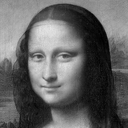

In [37]:
#im = np.array([[12, 13, 255,43],[0, 0, 0, 0], [10, 243, 255,143], [12, 13, 255,43], [12, 13, 255,43], [12, 13, 255,43]])
from PIL import Image
img = Image.open("/content/drive/My Drive/Coding Deep/Chaos/GLS Neuron Compression/data2/Mona_Lisa.png").convert('L')
#(M,N) = img.
img

In [0]:
im = np.array(img)
(M,N) = im.shape

In [39]:
im.shape

(128, 128)

### Vectorize the image


In [0]:
im_vec = im.flatten() ##appending row wise to get a single array

### Get Bit plane from vectorized image

In [0]:
#bit_value = im_vec2binary_list(im_vec, bits)
imbit_array = dec2bitplane(im_vec, bits)

In [0]:
def entropy(p):
  H = -(p * np.log2(p) + (1 - p) * np.log2(1 - p) )
  return H

In [0]:
from decimal import *
import math
p= []
initial_val = []
fsize = []
for i in range(0, bits):
  p.append( float(imbit_array[i,:].tolist().count(0))/float(M*N) )
  H = entropy(p[i])
  bit_len = M*N
  getcontext().prec = math.ceil(M * N * H)
  fsize.append(math.ceil(M * N * H))
  a = Decimal(0) 
  #b = Decimal(0.5)
  c = Decimal(1)
  b = Decimal(p[i])
  ## Get initial value
  initial_val.append(np.sum(inv_skew_tent(imbit_array[i,:], a,b,c))/2)
  
  with open('/content/drive/My Drive/Coding Deep/Chaos/GLS Neuron Compression/data2/initial_val.txt', 'a') as the_file:
    the_file.write(str(initial_val[i])+"\n")
  with open('/content/drive/My Drive/Coding Deep/Chaos/GLS Neuron Compression/data2/p_val.txt', 'a') as the_file:
    the_file.write(str(p[i])+"\n")





In [44]:
print("The file size is :", np.sum(fsize))

The file size is : 128056


In [45]:
print("The Probability values are: ", p)

The Probability values are:  [0.613525390625, 0.696533203125, 0.60333251953125, 0.48052978515625, 0.498046875, 0.5057373046875, 0.49847412109375, 0.49578857421875]
